In [1]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def fourier(x):
    return np.concatenate((np.cos(x), np.sin(x)), axis=-1)

In [2]:
import numpy as np
from scipy.stats import cauchy

def sphere(shape):
    x = np.random.normal(size=shape)
    return (x.T / np.linalg.norm(x.T, axis=0)).T

def normal(shape, mean=0, stdev=1):
    return stdev * np.random.normal(size=shape) + mean

def uniform(shape, low=-1, high=1):
    return np.random.uniform(size=shape)*(high-low) + low

def cauchy(shape, loc=0, scale=1):
    return cauchy.rvs(loc=loc, scale=scale, size=shape)

In [3]:
import numpy as np
# from dists import *
# from activations import *


def make_X(d, m, dist=sphere):
    return dist((m, d))

def make_W(d, N, q, dist=normal):
    W = np.zeros((N, d))
    i = 0
    while (i<N):
        w = dist(d)
        ind = np.random.choice(d, d-q, replace=False)
        w[ind] = 0
        W[i, :] = w
        i += 1

    return W

def make_A(X, W, active=relu):
    return active(np.matmul(X, W.T))

In [4]:
# setup parameters and generate data
d, m, N, q = 5, 1000, 10000, 3
X = make_X(d, m, dist=uniform)
W = make_W(d, N, q)
A = make_A(X, W, active=fourier)

In [5]:
# get y from some function
import numpy.linalg as la
# generate y with y = (1+\|x\|^2)^{-1/2}
noise_level = 0
y_true = (1+la.norm(X, axis=1))**(-0.5)
y = y_true + np.random.normal(0, 1, m) * noise_level
# y = np.sum(X, axis=1)**2
y[:10]

array([0.64658206, 0.64749689, 0.7783336 , 0.65228196, 0.6747194 ,
       0.60235746, 0.61843729, 0.62185094, 0.64514185, 0.64423268])

In [6]:
# generate training and test data
p = 0.7
tt = int(m * p)
A_train = A[:tt, :]
A_test = A[tt:, :]
y_train = y[:tt]
y_test = y_true[tt:]
print(A.shape, A_train.shape, A_test.shape)

(1000, 20000) (700, 20000) (300, 20000)


In [7]:
# min-norm solution
w_min = la.pinv(A_train)@y_train
print(w_min.shape)
y_pred = A_test @ w_min
mse_min = 1/(m-tt) * la.norm(y_pred-y_test)**2
print(mse_min)

(20000,)
0.00044141151453876143


In [8]:
# weights for weighted min-norm solution
norm = la.norm(W, axis=1)**2
print(norm.shape, norm[:10])
weight = np.concatenate((norm, norm), axis=-1)
D = np.diag(1.0/weight**4)
print(weight.shape, D.shape)

(10000,) [1.80674262 0.8312104  2.33307146 0.46582384 0.61820776 3.74578331
 5.73563121 4.23721771 2.4267433  2.50754604]
(20000,) (20000, 20000)


In [9]:
# weighted min-norm solution
w_weighted = D@la.pinv(A_train@D)@y_train
print(w_weighted.shape)
y_predw = A_test @ w_weighted
mse_w = 1/(m-tt) * la.norm(y_predw-y_test)**2
print(mse_w)

(20000,)
0.00013157635550115252


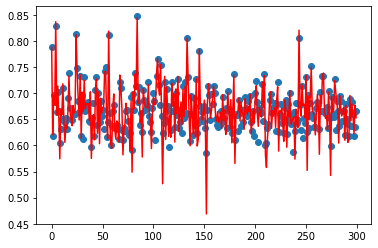

In [10]:
# plot for plain min-norm solution
import matplotlib.pyplot as plt
ind = np.array(range(m-tt))
plt.scatter(ind, y_test)
plt.plot(y_pred, color='r')

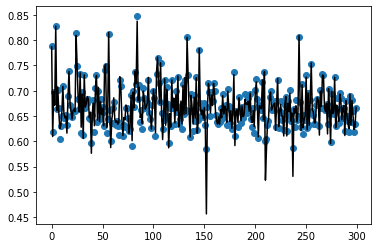

In [11]:
# plot for weighted min-norm solution
plt.scatter(ind, y_test)
plt.plot(y_predw, color='k')

In [12]:
y_test[:10]

array([0.78788324, 0.61843255, 0.6973858 , 0.68289929, 0.82863411,
       0.66321618, 0.70209746, 0.66643222, 0.60429877, 0.63121163])

In [13]:
y_predw[:10]

array([0.78713493, 0.60949036, 0.69855346, 0.67148293, 0.8274672 ,
       0.66054547, 0.70741091, 0.65773946, 0.6252512 , 0.63225608])

In [14]:
y_pred[:10]

array([0.78779999, 0.62039792, 0.69578366, 0.67758904, 0.83675879,
       0.65864412, 0.71338571, 0.65425368, 0.57432982, 0.66924911])